In [1]:
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

# collection of machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
print(train.head())

   id  bin_0  bin_1  bin_2 bin_3 bin_4 nom_0      nom_1    nom_2       nom_3  \
0   0    0.0    0.0    0.0     F     N   Red  Trapezoid  Hamster      Russia   
1   1    1.0    1.0    0.0     F     Y   Red       Star  Axolotl         NaN   
2   2    0.0    1.0    0.0     F     N   Red        NaN  Hamster      Canada   
3   3    NaN    0.0    0.0     F     N   Red     Circle  Hamster     Finland   
4   4    0.0    NaN    0.0     T     N   Red   Triangle  Hamster  Costa Rica   

   ...      nom_9 ord_0        ord_1     ord_2 ord_3 ord_4  ord_5  day month  \
0  ...  02e7c8990   3.0  Contributor       Hot     c     U     Pw  6.0   3.0   
1  ...  f37df64af   3.0  Grandmaster      Warm     e     X     pE  7.0   7.0   
2  ...        NaN   3.0          NaN  Freezing     n     P     eN  5.0   9.0   
3  ...  f9d456e57   1.0       Novice  Lava Hot     a     C    NaN  3.0   3.0   
4  ...  c5361037c   3.0  Grandmaster      Cold     h     C     OZ  5.0  12.0   

  target  
0      0  
1      0  
2    

In [4]:
missing = train.isnull().sum()
print(missing)

id            0
bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64


In [5]:
bin_ = [  i for i in train.columns if 'bin_' in i]
print(bin_)
nom_ = [col for col in train.columns if 'nom_' in col]
print(nom_)
ord_ = [col for col in train.columns if 'ord_' in col]
print(ord_)

['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']
['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']


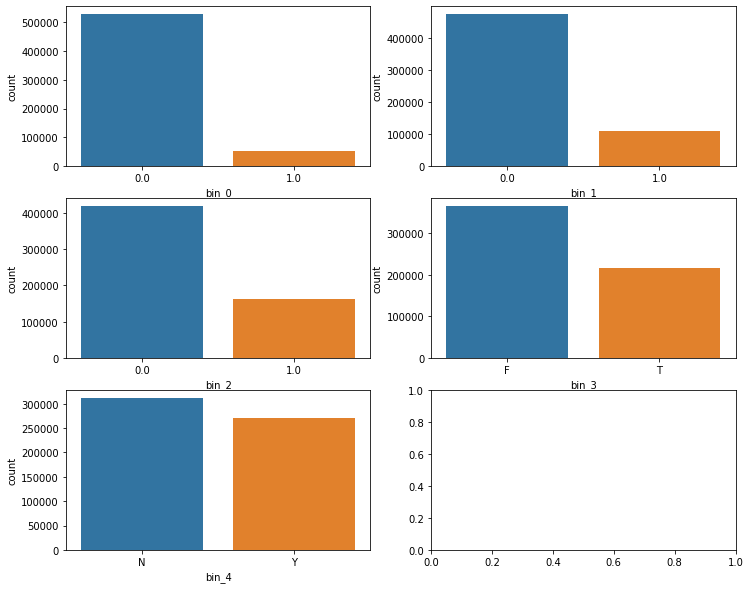

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
for ax, column in zip(axes.flatten(), bin_):
    sns.countplot(x = column, ax = ax, data = train)

plt.show()

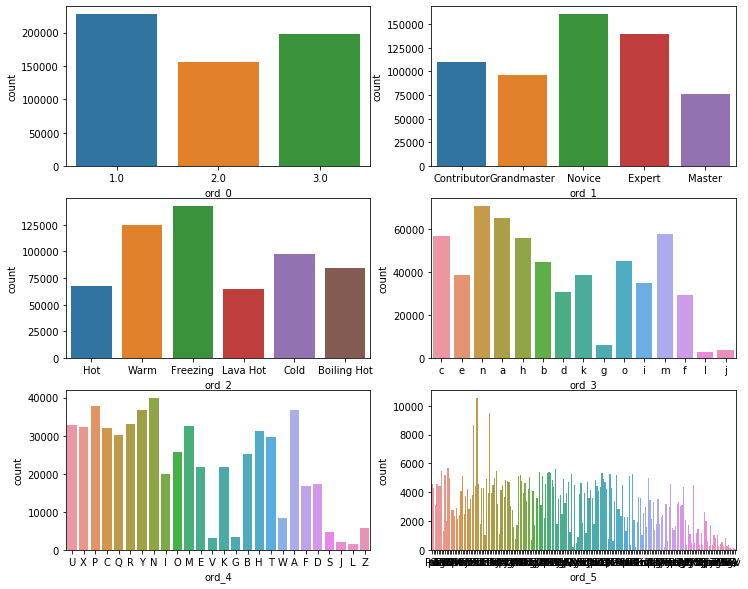

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))

for ax, column in zip(axes.flatten(), ord_):
    sns.countplot(x = column, ax = ax, data = train)

plt.show()

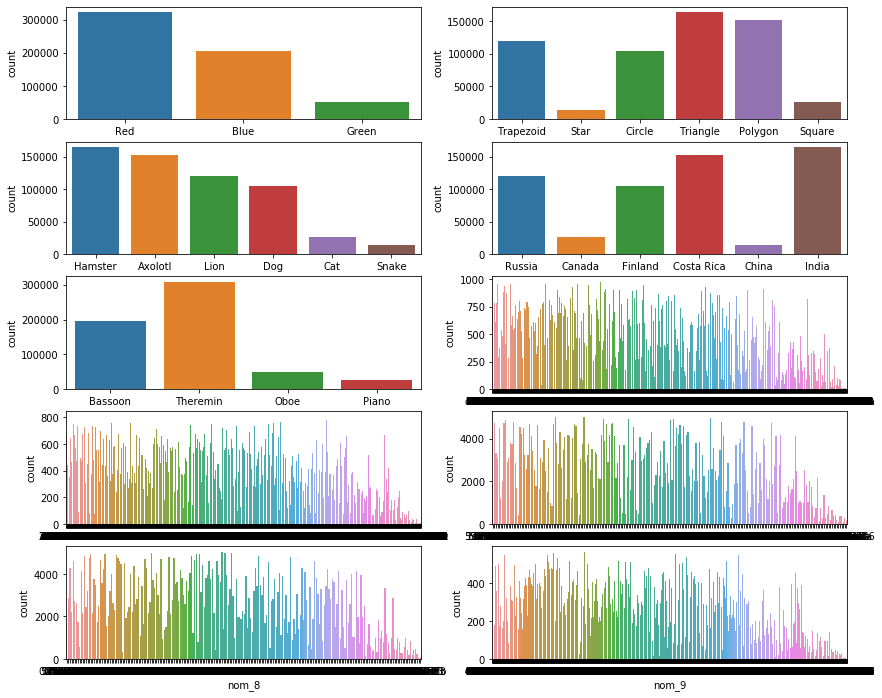

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,12))

for ax, column in zip(axes.flatten(), nom_):
    sns.countplot(x = column, ax = ax, data = train)

plt.show()

In [10]:
cat_cols = [col for col, dt in train.dtypes.items() if dt == object]

y_col = ['target']

cont_cols = [col for col in train.columns if col not in cat_cols + y_col]

print(f'cat_cols  {len(cat_cols)} kolon')
print(f'cont_cols {len(cont_cols)} kolon')

cat_cols  17 kolon
cont_cols 7 kolon


### EKSİK VERİ DÜZENLEME

In [13]:
imputer = SimpleImputer(strategy='most_frequent')

imputer = imputer.fit(train[cont_cols])
train[cont_cols] = imputer.transform(train[cont_cols])

# test verileri için
imputer = imputer.fit(test[cont_cols])
test[cont_cols] = imputer.transform(test[cont_cols])


for cat in cat_cols:
    if train[cat].isnull().sum() > 0:
        train[cat] = train[cat].fillna(train[cat].mode()[0])

    if test[cat].isnull().sum() > 0:
        test[cat] = test[cat].fillna(test[cat].mode()[0])

In [12]:
print(train.isnull().sum() )

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64


In [14]:
missing = train.isnull().sum()
missing[missing > 0].sort_values()

Series([], dtype: int64)

In [15]:
# Object sütunlarımızı kategori türlerine dönüştürün.
for cat in cat_cols:
    train[cat] = train[cat].astype('category')

train.info()

for cat in cat_cols:
    test[cat] = test[cat].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
id        600000 non-null float64
bin_0     600000 non-null float64
bin_1     600000 non-null float64
bin_2     600000 non-null float64
bin_3     600000 non-null category
bin_4     600000 non-null category
nom_0     600000 non-null category
nom_1     600000 non-null category
nom_2     600000 non-null category
nom_3     600000 non-null category
nom_4     600000 non-null category
nom_5     600000 non-null category
nom_6     600000 non-null category
nom_7     600000 non-null category
nom_8     600000 non-null category
nom_9     600000 non-null category
ord_0     600000 non-null float64
ord_1     600000 non-null category
ord_2     600000 non-null category
ord_3     600000 non-null category
ord_4     600000 non-null category
ord_5     600000 non-null category
day       600000 non-null float64
month     600000 non-null float64
target    600000 non-null int64
dtypes: category(17), fl

In [16]:
# train Nom3 label encoder yaptık ve dataframe dönüştürdük
    
print(train.nom_3.unique()) 
print(train.nom_3.cat.codes.unique())
pd.DataFrame(train.nom_3.cat.codes.unique(), train.nom_3.unique())

[Russia, India, Canada, Finland, Costa Rica, China]
Categories (6, object): [Russia, India, Canada, Finland, Costa Rica, China]
[5 4 0 3 2 1]


,0
Russia,5
India,4
Canada,0
Finland,3
Costa Rica,2
China,1


Kaç Değişken Var id        600000
bin_0          2
bin_1          2
bin_2          2
bin_3          2
bin_4          2
nom_0          3
nom_1          6
nom_2          6
nom_3          6
nom_4          4
nom_5       1220
nom_6       1519
nom_7        222
nom_8        222
nom_9       2218
ord_0          3
ord_1          5
ord_2          6
ord_3         15
ord_4         26
ord_5        190
day            7
month         12
target         2
dtype: int64


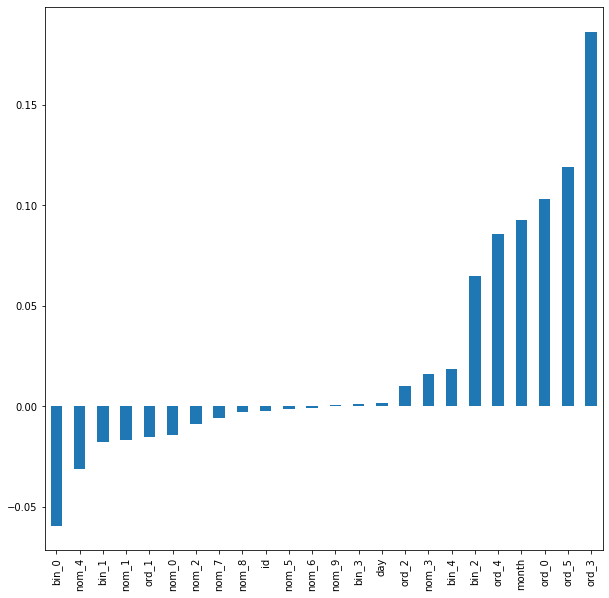

In [17]:
for col in cat_cols:
    train[col] = train[col].cat.codes

for col in cat_cols:
    test[col] = test[col].cat.codes

print("Kaç Değişken Var", train.nunique())
train.corr()['target'][:-1].sort_values().plot.bar(figsize=(10, 10))

In [18]:
# Train Test Ayırdık
X = train.drop(['id', 'target'], axis=1).values
y = train['target'].values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
# Standize Ettik
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Grid Search
logreg = LogisticRegression(class_weight='balanced')
parameters = {'C':[0.1,5,10]}
clf_grid = GridSearchCV(logreg,parameters,scoring='roc_auc',refit=True,cv=5, n_jobs=-1)
clf_grid.fit(X_train, y_train)
print('En iyi roc_auc: {:.4},  C: {}'.format(clf_grid.best_score_, clf_grid.best_params_))

En iyi roc_auc: 0.7147,  C: {'C': 5}


In [24]:
classifier = LogisticRegression(   solver= 'liblinear', C=  5, max_iter= 1000)
classifier.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = classifier.predict(X_test)

In [27]:
test = test.drop(['id'], axis=1).values
scalert = MinMaxScaler()
scalert.fit(test)
r_test = scalert.transform(test)

predictions = classifier.predict(r_test)